Analisando dados do mercado imobiliario Brasileiro

In [ ]:
file_loc = "dbfs:/FileStore/Brasile_real_estate_dataset.csv"

Importação da biblioteca pandas do Spark como ps

In [ ]:
import pyspark.pandas as ps

df = ps.read_csv(file_loc)

Exibição das primeiras linhas do DataFrame para verificação

In [ ]:
df.head()

,_c0,property_type,state,region,lat,lon,area_m2,price_brl
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72,414222.98
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136,848408.53
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75,299438.28
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187,848408.53
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80,464129.36


Removendo índice desnecessário

In [ ]:
df = df.drop(['_c0'], axis=1)

Removendo dados nulos no dataset

In [ ]:
df= df.dropna()

Criando uma nova coluna demonstrando preço por metro quadrado

In [ ]:
df['cost_per_m2'] = df['price_brl'] / df['area_m2']

In [ ]:
df.head()

,property_type,state,region,lat,lon,area_m2,price_brl,cost_per_m2
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72,414222.98,5753.096944
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136,848408.53,6238.298015
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75,299438.28,3992.510400
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187,848408.53,4536.944011
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80,464129.36,5801.617000


Identificação dos estados presentes no DataFrame

In [ ]:
df['state'].unique()

Out[7]: 0         Santa Catarina
1                  Piau�
2             Pernambuco
3      Rio Grande do Sul
4    Rio Grande do Norte
5              S�o Paulo
6                Sergipe
7         Rio de Janeiro
8               Rond�nia
9              Tocantins
Name: state, dtype: object

Correção erros de digitação nos nomes dos estados, provavelmente causados por acentos

In [ ]:
df['state'] = df['state'].str.replace('Piau�', 'Piauí')
df['state'] = df['state'].str.replace('S�o Paulo', 'Sao Paulo')
df['state'] = df['state'].str.replace('Rond�nia', 'Rondonia')

Verificação da forma (número de linhas e colunas) do DataFrame após limpeza e preparação dos dados

In [ ]:
df.shape

Out[9]: (11293, 8)

Cálculo do preço médio por estado ('preço_medio') agrupando pelo estado ('state') e calculando a média dos preços ('price_brl')

In [ ]:
preço_medio = df.groupby('state')['price_brl'].mean()

Criação de um novo DataFrame ('df_preço_medio') para armazenar o preço médio por estado e ordenação dos resultados em ordem decrescente

In [ ]:
df_preço_medio = ps.DataFrame(preço_medio)
df_preço_medio = df_preço_medio.reset_index()
df_preço_medio = df_preço_medio.rename(columns={'state': 'Estado'},)
df_preço_medio = df_preço_medio.rename(columns={'price_brl': 'Preço'},)
df_preço_medio.sort_values(by='Preço',inplace=True,ascending=False)
df_preço_medio

,Estado,Preço
0,Santa Catarina,725950.664381
8,Rio de Janeiro,718089.854845
4,Sao Paulo,682352.359108
3,Pernambuco,676714.778679
5,Rio Grande do Sul,556649.195717
6,Rio Grande do Norte,515973.909503
2,Piauí,491873.270000
7,Sergipe,454313.512206
1,Rondonia,355377.536000
9,Tocantins,289457.010000


# Pergunta: Qual é o estado com metro quadrado mais caro?
Resposta: Santa Catarina possui o metro quadrado mais caro, enquanto Tocantins possui o mais barato.

Visualização do preço médio por estado em um gráfico de barras

In [ ]:
df_preço_medio.plot.bar(x='Estado',y='Preço')

# Pergunta: O quão importantes é o tamanho do imóvel na precificação de imóveis? Vamos visualizar essa correlação com um gráfico de dispersão.
Podemos observar que os dados são bastante relacionados, demonstrando que o preço aumenta de acordo com o tamanho do imóvel.

Visualização da correlação entre o preço e o tamanho do imóvel (metro quadrado)

In [ ]:
df_scatter_p2 = df.rename(columns={'price_brl': 'Preço'},)
df_scatter_p2 = df_scatter_p2.rename(columns={'area_m2': 'Metro quadrado'},)
df_scatter_p2.plot.scatter(x='Preço',y='Metro quadrado', trendline='ols', trendline_color_override = 'red')

# Pergunta: Qual tipo de propriedade é mais cara?
Resposta: Apartamentos, em média, são mais caros que casas.

Cálculo do preço médio por tipo de propriedade ('property_type') e visualização em um gráfico de barras

In [ ]:
preço_tipo = df.groupby('property_type')['price_brl'].mean()
df_preço_tipo = ps.DataFrame(preço_tipo)
df_preço_tipo.plot.bar()

# Pergunta: Em cada estado, mais casas ou apartamentos são vendidos?
Resposta: Podemos observar que apartamentos são o tipo de propriedade mais vendida, tanto individualmente por estado, quanto no geral

Visualização da quantidade de vendas de apartamentos e casas por estado em um gráfico de barras

In [ ]:
qntd_por_estado = df.groupby('state')['property_type'].value_counts()
df_qntd_por_estado = qntd_por_estado.reset_index(name='count')
apto = df_qntd_por_estado[df_qntd_por_estado['property_type'] == 'apartment']
casa = df_qntd_por_estado[df_qntd_por_estado['property_type'] == 'house']
tipo_por_estado = df_qntd_por_estado.pivot(index='state', columns='property_type', values='count').fillna(0).reset_index()
tipo_por_estado = tipo_por_estado.rename(columns={'apartment': 'Apartamento', 'house': 'Casa', 'state': 'Estado'})

tipo_por_estado.plot.bar(x='Estado',y=['Apartamento', 'Casa'])

# Olhando mais de perto o exemplo de estado com mais propriedades:
Podemos observar que, segundo o dataset, apartamentos são vendidos mais que 2 vezes a mais que casas

Visualização do exemplo de estado com mais propriedades vendidas (São Paulo) usando um gráfico de pizza

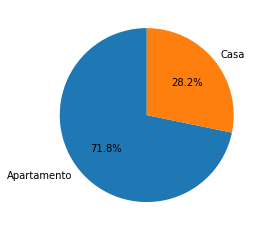

In [ ]:
import matplotlib.pyplot as plt

sp_data = tipo_por_estado.loc[tipo_por_estado['Estado']=='Sao Paulo']
sp_data = sp_data.rename(columns={'apartment': 'Apartamento', 'house': 'Casa'})
plt.pie(sp_data.iloc[0, 1:], labels = sp_data.columns[1:], autopct='%1.1f%%', startangle=90)
plt.show()


# Após analisar os dados imobiliários brasileiros, podemos destacar várias insights interessantes:

- Variação de Preços por Estado: Santa Catarina se destaca como o estado com o metro quadrado mais caro, enquanto Tocantins apresenta os preços mais acessíveis. Essa disparidade pode refletir diferenças econômicas e demanda por região.

- Impacto do Tamanho na Precificação: O tamanho do imóvel, medido em metros quadrados, tem uma correlação significativa com o preço. Imóveis maiores geralmente têm preços mais altos, conforme observado na análise de dispersão.

- Diferença entre Tipos de Propriedade: Apartamentos mostraram-se mais caros em média do que casas, sugerindo preferências de mercado e diferenciação de preço com base no tipo de propriedade.

- Preferências de Compra por Estado: A maioria dos estados mostra uma predominância de vendas de apartamentos em relação a casas. São Paulo exemplifica claramente essa tendência, com uma proporção significativa de apartamentos vendidos em comparação com casas.

Salvando arquivo em parquet:

In [ ]:
df = ps.DataFrame(df)
df.to_parquet('/FileStore/tables/brazil_real_estate.parquet')